# Quick Sort Corner Cases

In [29]:
# global imports
from time import time
import numpy as np
import matplotlib.pyplot as plt

## Quick Sort Function
Note that I set the pivot index to be the smallest element so the worst case runtime will occur for an array in ascending order

In [2]:
# quick sort function
def quickSort(arr, low, high):
    '''sorts an array of integers from smallest to largest'''
    if low >= high:
        return
    pivotIndex = partition(arr, low, high)
    quickSort(arr, low, pivotIndex - 1)
    quickSort(arr, pivotIndex + 1, high)

# partition function
def partition(nums, low, high):
    '''creates a median pivot point and splits a list of numbers between smaller than pivot and larger than pivot'''
    pivotIndex = low
    swap(nums, pivotIndex, high)
    i = low
    for j in range(low, high, 1):
        if nums[j] <= nums[high]:
            swap(nums, i, j)
            i = i + 1
    swap(nums, i, high)
    return i

# swap function
def swap(nums, i, j):
    '''swaps the order of two items in an array'''
    temp = nums[i]
    nums[i] = nums[j]
    nums[j] = temp

## Arrays with Unusual Lengths

### Array of Length 0
Outcome 
* quickSort() successfully sorts an array of length 0

In [5]:
# array of length 0
empty = []
hi = len(empty) - 1
quickSort(empty, 0, hi)
empty

[]

### Array of Length 1
Outcome 
* quickSort() successfully sorts an array of length 1

In [6]:
# array of length 1
single = [1]
hi = len(single) - 1
quickSort(single, 0, hi)
single

[1]

## Arrays with Different Data Types
quickSort() was designed to sort arrays containing positive integers. Here, I call quickSort() to order arrays that do not meet this assumption. 
### Array with Negative Numbers
Outcome
* quickSort() successfully sorts an array with negative numbers

In [7]:
# array with negative numbers
neg = [0, 9, -1, 3, 5, -3, 7, -16, 3]
hi = len(neg) - 1
quickSort(neg, 0, hi)
neg

[-16, -3, -1, 0, 3, 3, 5, 7, 9]

### Array with Decimals
Outcome
* quickSort() successfully sorts an array with decimals

In [8]:
# array with decimals
dec = [1, 3, 5, 2, 9, 4.4, 3, 6, 2, 8, 3]
hi = len(dec) - 1
quickSort(dec, 0, hi)
dec

[1, 2, 2, 3, 3, 3, 4.4, 5, 6, 8, 9]

### Array with String
Outcome
* quickSort() cannot sort an array with a string
* an error message occurs because the function cannot compare integers and strings

Correction
* create an if/else loop at the beginning of quickSort()
* have the loop check that an array only contains integers
    * if the array contains a string, raise ValueError
    
Modification
* create a new array that does not contain the string with an if/else statement
* sort the new array using quickSort()
* use append() to add the string to the end of the sorted array

In [9]:
# array with string
strNum = [6, 2, 4, 7, 2, 'hi', 9, 0, 1, 3, 7]
hi = len(strNum) - 1
quickSort(strNum, 0, hi)

TypeError: '<=' not supported between instances of 'str' and 'int'

### Array of Letters
Outcome
* quickSort() successfully sorts an array of letters
* letters are sorted alphabetically

In [10]:
# array of letters
letters = ['a', 'd', 'g', 'b', 'a', 'z', 'p']
hi = len(letters) - 1
quickSort(letters, 0, hi)
letters

['a', 'a', 'b', 'd', 'g', 'p', 'z']

### Array of Strings
Outcome
* quickSort() successfully sorts an array of strings
* strings are sorted alphabetically

In [12]:
# array of strings
strings = ['hi', 'cat', 'apple', 'a', 'stat', 'horse', 'car']
hi = len(strings) - 1
quickSort(strings, 0, hi)
strings

['a', 'apple', 'car', 'cat', 'hi', 'horse', 'stat']

## Performance on Arrays with Different Structures
Compare the average runtime for
- arrays where all elements are the same
- arrays where all place values are the same except the ones place
    - elements in the arrays are 1000000000 + (random integer between 0 and 9)
- arrays where elements are arranged in ascending order
- arrays where elements are arranged in descending order
  
### Timing Function

In [14]:
def timeOneQuick(arr):
    '''times how long it takes to sort an array'''
    hi = len(arr) - 1
    t = 0
    t0 = time()
    s = quickSort(arr, 0, hi)
    t1 = time()
    t = t1 - t0
    return t

### Sort Arrays and Find Run Time 
Note that different arrays had to be used for quickSort() because maximum recursions were exceeded. 

In [32]:
# import arrays
%store -r arrqSame
%store -r arrqKey
%store -r arrqInc
%store -r arrqDec

# master array of arrays
arr = [arrqSame, arrqKey, arrqInc, arrqDec]

# initiate time arrays
timeSame = []
timeKey = []
timeInd = []
timeDec = []

# master array of time arrays
times = [timeSame, timeKey, timeInd, timeDec]

# time how long it takes to sort each array
for i in range(0,4):
    for j in range(0,6):
        a = arr[i][j]
        t = timeOneQuick(a)
        times[i].append(t)

### Average Run Time of Sorting Each Array Structure

In [33]:
# initiate array of means
means = []

# find mean of each array type
for i in times:
    mean = np.mean(i)
    means.append(mean)

### Bar Graph of Average Run Time
* quickSort() performs the best when all place values are the same except the ones
* quickSort() performs the worst when all elements are the same value
    * in general, the worst case quickSort() performs the worst when all elements are already sorted, so it should perform the worst when all elements are the same value and when elements are in descending order
    * since the arrays used were small (only 1000 elements), the runtime data does not reflect this as well as we would expect
    * if arrays were larger, we would expect the runtimes in these two scenarios to be closer

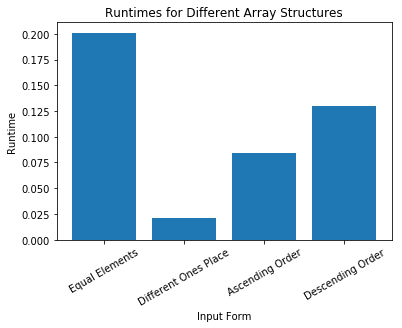

In [34]:
# labels for bar graph
label = ['Equal Elements','Different Ones Place','Ascending Order','Descending Order']
index = np.arange(len(label))

# bar graph
plt.bar(index, means)
plt.xlabel('Input Form')
plt.ylabel('Runtime')
plt.xticks(index, label, rotation=30)
plt.title('Runtimes for Different Array Structures')
plt.show()